<a href="https://colab.research.google.com/github/2303a51667/abhirammudumba/blob/main/Lab%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-10-03 05:58:35--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.003s  

2024-10-03 05:58:35 (19.0 MB/s) - ‘titanic_train.csv’ saved [60302/60302]

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  

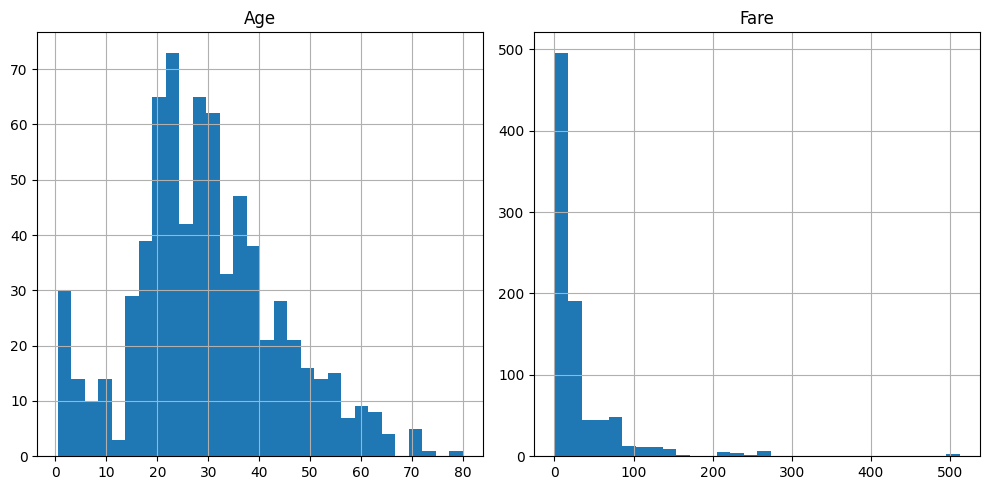

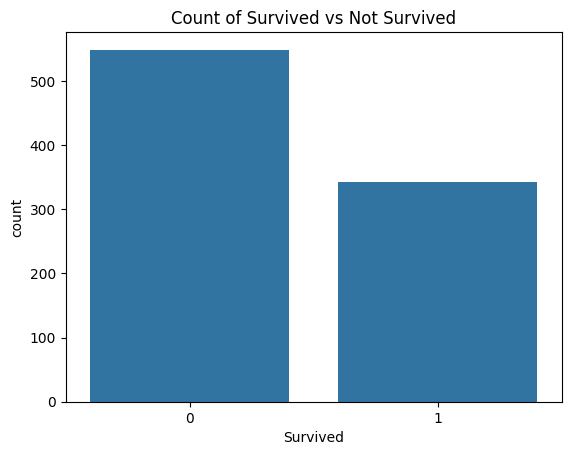

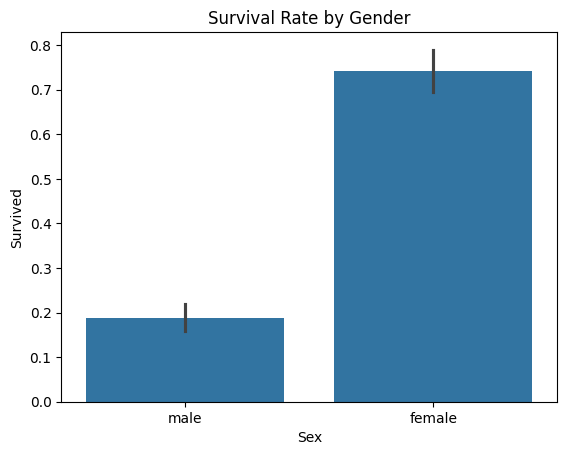

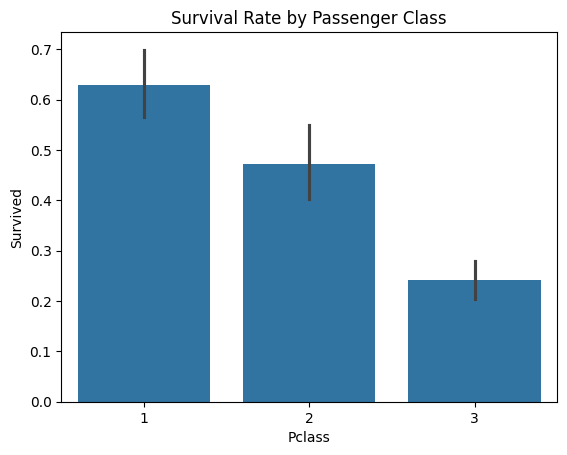

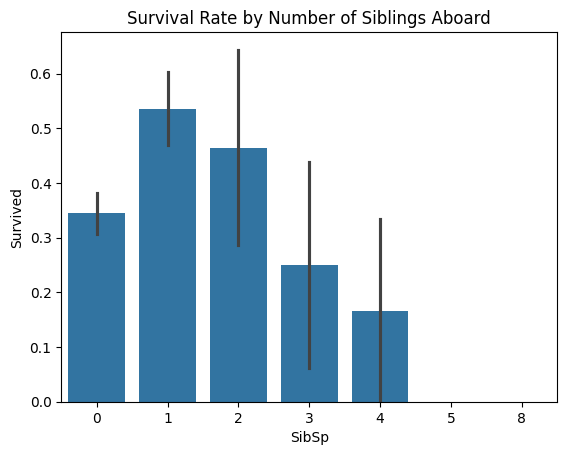

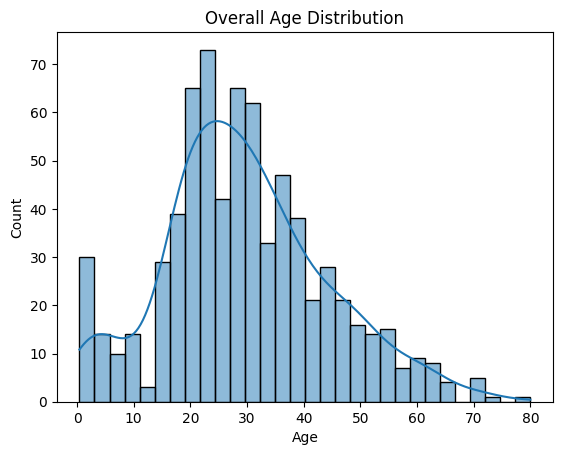

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


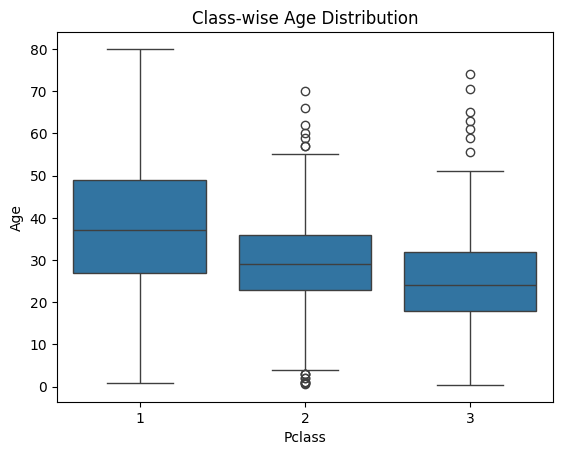

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500       2.0
1            2         1       1    1  38.0      1      0  71.2833       0.0
2            3         1       3    1  26.0      0      0   7.9250       2.0
3            4         1       1    1  35.0      1      0  53.1000       2.0
4            5         0       3    0  35.0      0      0   8.0500       2.0


<ipython-input-4-270e00e11e48>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Option 1: If the file is in the current working directory**
# titanic_df = pd.read_csv('titanic_train.csv')

# **Option 2: If the file is in a different location, provide the full path**
# titanic_df = pd.read_csv('/path/to/your/file/titanic_train.csv')

# **Option 3 (Recommended if the file is not present):**
# Download the dataset and place it in the 'data' folder.
# If the 'data' folder doesn't exist, create it.
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -O titanic_train.csv
titanic_df = pd.read_csv('titanic_train.csv')

print(titanic_df.dtypes)
summary_stats = titanic_df.describe(percentiles=[.25, .5, .75, .9])
print(summary_stats)
column_names = titanic_df.columns.tolist()
print(column_names)
numeric_features = ['Age', 'Fare']
titanic_df[numeric_features].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Survived vs Not Survived')
plt.show()
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Survival Rate by Number of Siblings Aboard')
plt.show()
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Overall Age Distribution')
plt.show()
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Class-wise Age Distribution')
plt.show()
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.drop(columns=['Ticket', 'Name', 'Cabin'], inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print(titanic_df.head())


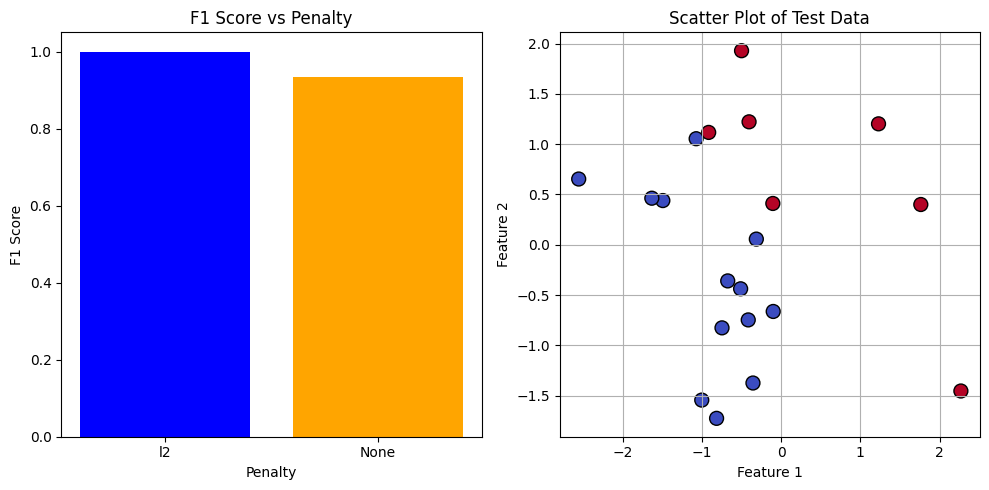

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

np.random.seed(0)
X = np.random.randn(100, 2)
Y = (X[:, 0] + X[:, 1] > 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

penalties = ['l2', None] # Changed 'none' to None
f1_scores = []
for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=1000)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    f1_scores.append(f1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Convert penalties to strings for plotting
bar_labels = [str(p) for p in penalties]
plt.bar(bar_labels, f1_scores, color=['blue', 'orange']) # Assuming color change is desired
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Test Data')
plt.grid(True)

plt.tight_layout()
plt.show()
